In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

import preprocess_utils as pu 

In [ ]:
img = cv2.imread('data/biowalk-0300.png',cv2.IMREAD_GRAYSCALE)
img_orig = cv2.resize(img[85:335, 150:300],None,fx=4, fy=4, interpolation = cv2.INTER_CUBIC)

# img_reduced = cv2.equalizeHist(img_reduced)
img_reduced = cv2.medianBlur(img_orig,5)
# res,img_thre = cv2.threshold(img_reduced,128,255,cv2.THRESH_TRUNC)

mask1 = cv2.medianBlur(img_orig - img_reduced,3)
mask2 = cv2.Laplacian(img_orig,cv2.CV_8U)
mn, mx = np.min(mask2), np.max(mask2)
mask2 = ((mask2-mn)*255)/(mx-mn)
hist_mask = cv2.calcHist([mask2],[0],None,[256],[0,256])

plt.figure(figsize=(12,15))
plt.subplot(221), plt.imshow(img_orig, 'gray'), plt.axis('off')
plt.subplot(222), plt.imshow(mask1, 'gray'), plt.axis('off')
plt.subplot(223), plt.imshow(mask2, 'gray'), plt.axis('off')
plt.subplot(224), plt.plot(hist_mask),plt.xlim([0,256])


(<matplotlib.axes._subplots.AxesSubplot at 0x7f0431ae0990>,
 (-0.5, 599.5, 999.5, -0.5))

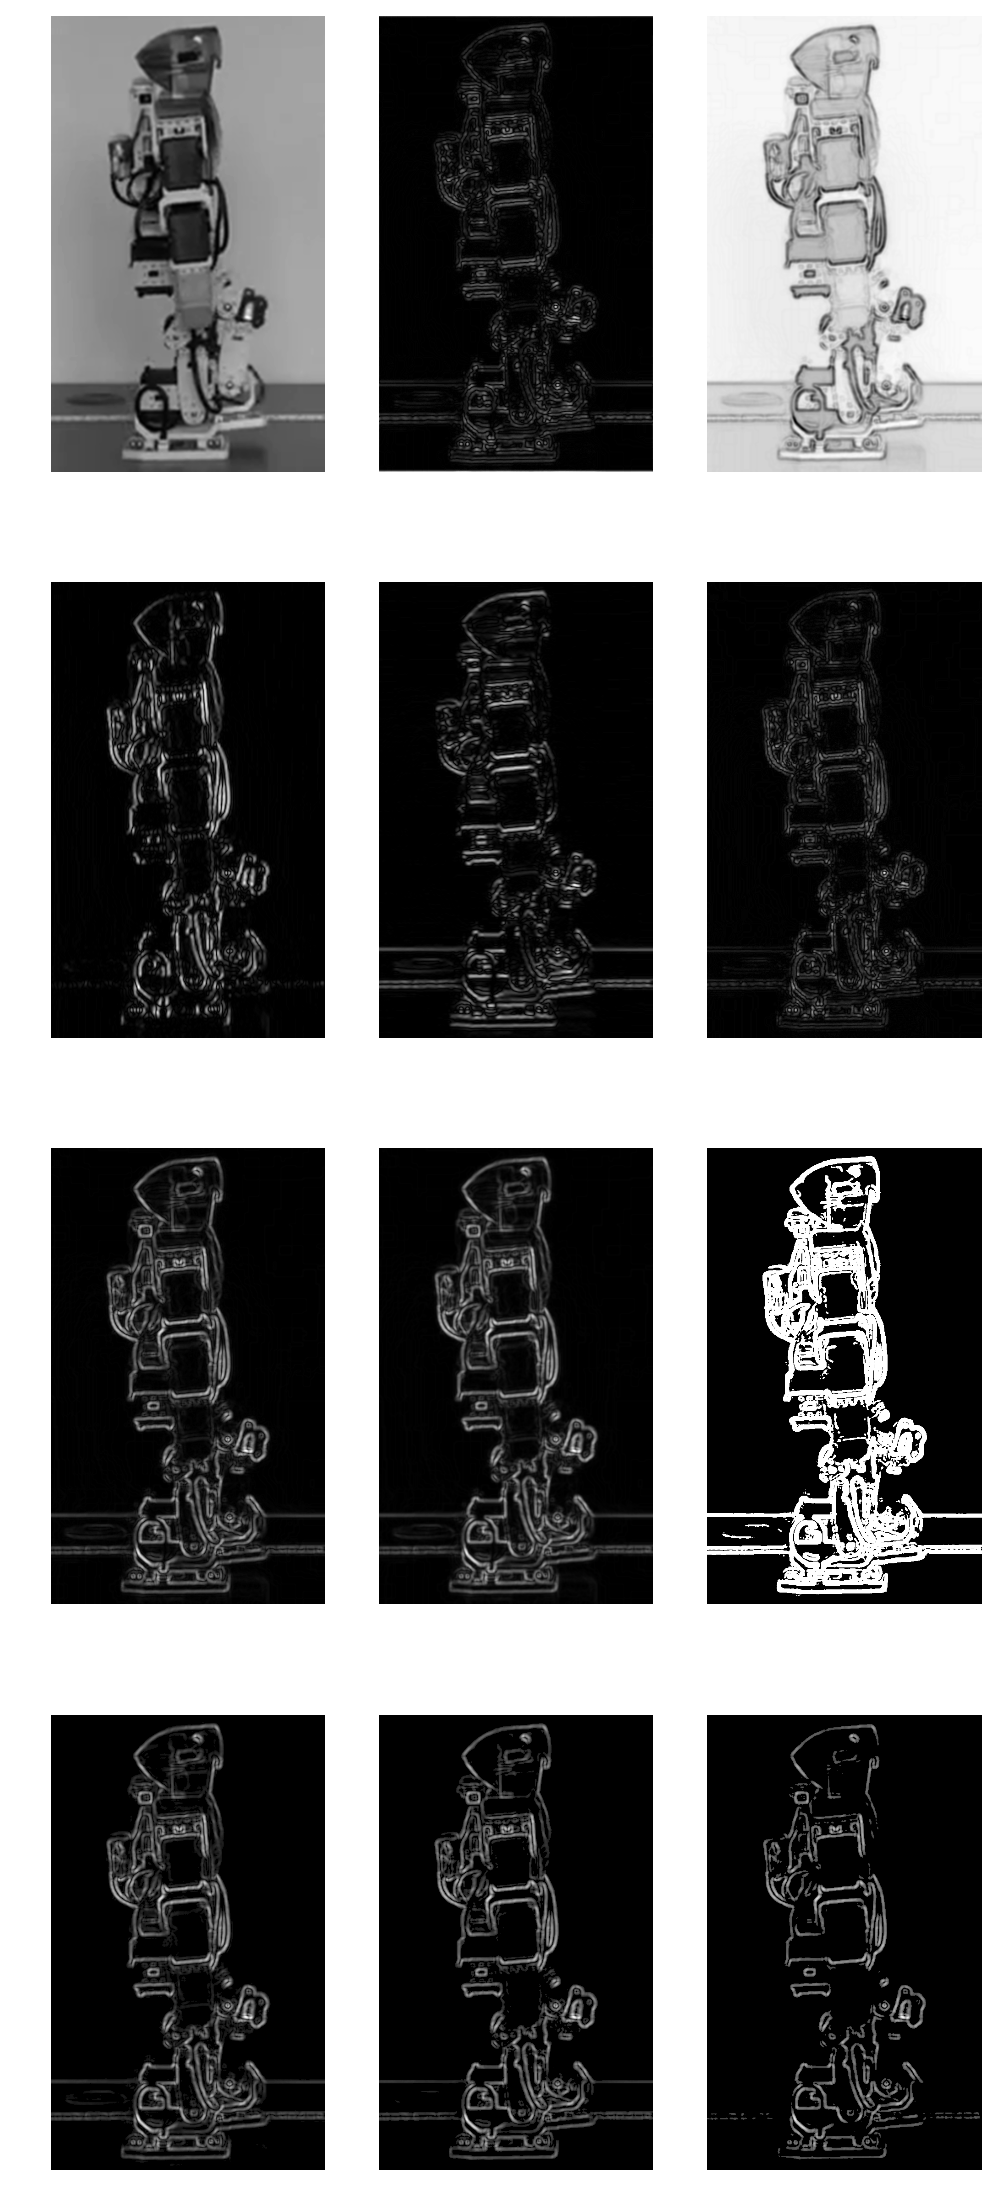

In [2]:
img = cv2.imread('data/biowalk-0300.png',cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('data/biowalk-0300.png',cv2.IMREAD_COLOR)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,1]
#img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)[:,:,0]
#img = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)[:,:,0]

img_orig = cv2.resize(img[85:335, 150:300],None,fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
img_orig = cv2.blur(img_orig,(5,5))

rows,cols = img_orig.shape
H_GHP = 1-pu.get_filter_for_image(rows,cols,60,pu.filter_gaussian_fcn,params=2)

img_hp = np.abs(pu.apply_frecuency_filter_to_image(np.float64(img_orig),H_GHP))

img_laplace = np.abs(cv2.Laplacian(img_orig,cv2.CV_64F,ksize=5))
img_sobel_x = np.abs(cv2.Sobel(img_orig,cv2.CV_64F,1,0,ksize=5))
img_sobel_y = np.abs(cv2.Sobel(img_orig,cv2.CV_64F,0,1,ksize=5))
img_bordes = 1.2*img_sobel_x+1.2*img_sobel_y+1.0*img_hp+0.75*img_laplace

img_resto = cv2.GaussianBlur(img_orig-0.1*img_bordes,(5,5),2)

img_bordes = pu.to_uint8(img_bordes)
border_thre = np.zeros_like(img_bordes); thr = 24
border_thre[img_bordes>=thr] = 255 #img_bordes[img_bordes>=thr]
border_thre2 = np.zeros_like(img_bordes); thr = 16
border_thre2[img_bordes>=thr] = img_bordes[img_bordes>=thr]
border_thre3 = np.zeros_like(img_bordes); thr = 32
border_thre3[img_bordes>=thr] = img_bordes[img_bordes>=thr]
border_thre4 = np.zeros_like(img_bordes); thr = 64
border_thre4[img_bordes>=thr] = img_bordes[img_bordes>=thr]

plt.figure(figsize=(12,28))
plt.subplot(431), plt.imshow(img_orig, 'gray'), plt.axis('off')
plt.subplot(432), plt.imshow(img_hp, 'gray'), plt.axis('off')
plt.subplot(433), plt.imshow(img_resto, 'gray'), plt.axis('off')
plt.subplot(434), plt.imshow(img_sobel_x, 'gray'), plt.axis('off')
plt.subplot(435), plt.imshow(img_sobel_y, 'gray'), plt.axis('off')
plt.subplot(436), plt.imshow(img_laplace, 'gray'), plt.axis('off')
plt.subplot(437), plt.imshow(img_bordes, 'gray'), plt.axis('off')
plt.subplot(438), plt.imshow(cv2.GaussianBlur(img_bordes,(5,5),1), 'gray'), plt.axis('off')
plt.subplot(439), plt.imshow(border_thre, 'gray'), plt.axis('off')
plt.subplot(4,3,10), plt.imshow(border_thre2, 'gray'), plt.axis('off')
plt.subplot(4,3,11), plt.imshow(border_thre3, 'gray'), plt.axis('off')
plt.subplot(4,3,12), plt.imshow(border_thre4, 'gray'), plt.axis('off')


(<matplotlib.axes._subplots.AxesSubplot at 0x7f043074b790>,
 (-0.5, 599.5, 999.5, -0.5))

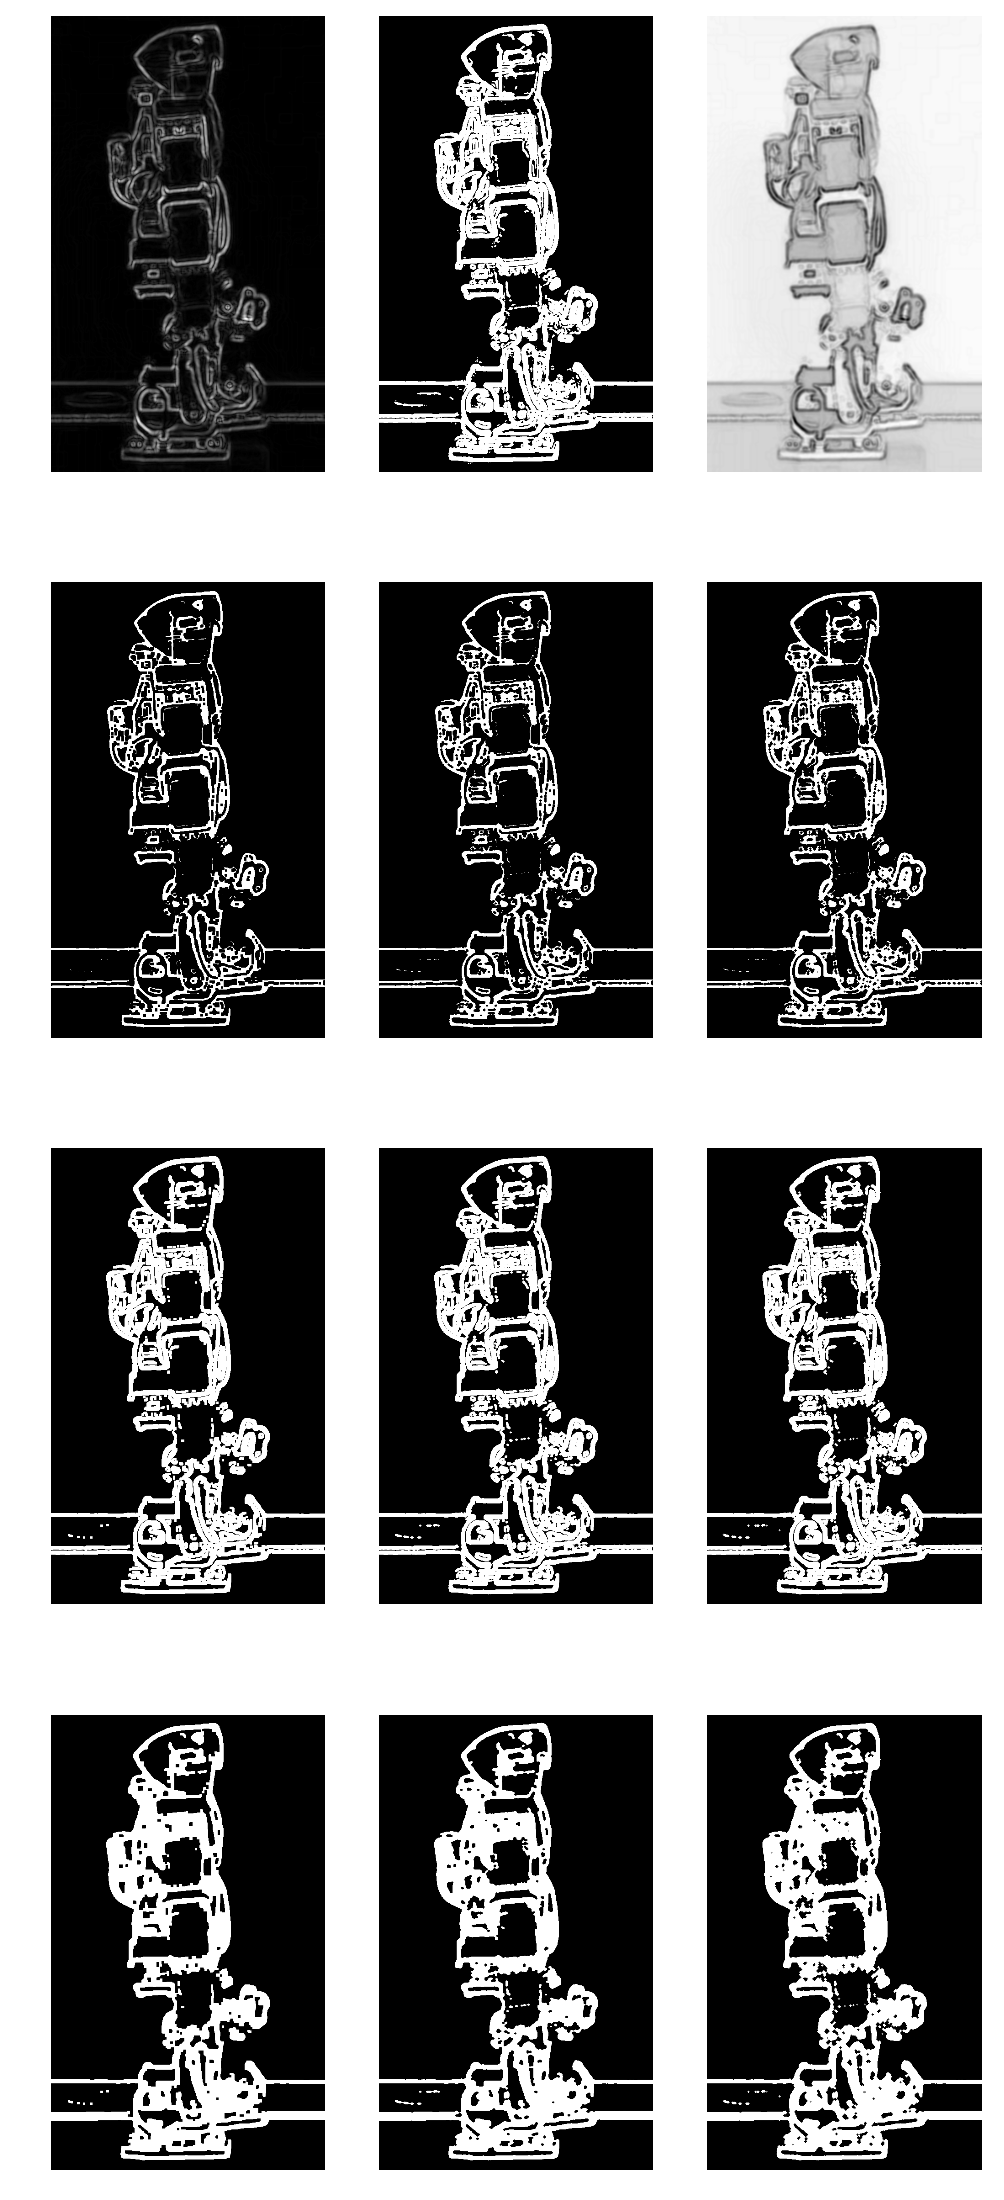

In [3]:
border_thre = np.zeros_like(img_bordes); thr = 24
border_thre[img_bordes>=thr] = 255
dim = 5
kernel_r = cv2.getStructuringElement(cv2.MORPH_RECT,(dim,dim))
kernel_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(dim,dim))
kernel_c = cv2.getStructuringElement(cv2.MORPH_CROSS,(dim,dim))
erosion_r = cv2.erode(border_thre,kernel_r,iterations = 1)
erosion_e = cv2.erode(border_thre,kernel_e,iterations = 1)
erosion_c = cv2.erode(border_thre,kernel_c,iterations = 1)
opening_r = cv2.morphologyEx(border_thre, cv2.MORPH_OPEN, kernel_r)
opening_e = cv2.morphologyEx(border_thre, cv2.MORPH_OPEN, kernel_e)
opening_c = cv2.morphologyEx(border_thre, cv2.MORPH_OPEN, kernel_c)
closing_r = cv2.morphologyEx(opening_r, cv2.MORPH_CLOSE, kernel_r)
closing_e = cv2.morphologyEx(opening_e, cv2.MORPH_CLOSE, kernel_e)
closing_c = cv2.morphologyEx(opening_c, cv2.MORPH_CLOSE, kernel_c)

plt.figure(figsize=(12,28))
plt.subplot(431), plt.imshow(img_bordes, 'gray'), plt.axis('off')
plt.subplot(432), plt.imshow(border_thre, 'gray'), plt.axis('off')
plt.subplot(433), plt.imshow(img_resto, 'gray'), plt.axis('off')
plt.subplot(434), plt.imshow(erosion_r, 'gray'), plt.axis('off')
plt.subplot(435), plt.imshow(erosion_e, 'gray'), plt.axis('off')
plt.subplot(436), plt.imshow(erosion_c, 'gray'), plt.axis('off')
plt.subplot(437), plt.imshow(opening_r, 'gray'), plt.axis('off')
plt.subplot(438), plt.imshow(opening_e, 'gray'), plt.axis('off')
plt.subplot(439), plt.imshow(opening_c, 'gray'), plt.axis('off')
plt.subplot(4,3,10), plt.imshow(closing_r, 'gray'), plt.axis('off')
plt.subplot(4,3,11), plt.imshow(closing_e, 'gray'), plt.axis('off')
plt.subplot(4,3,12), plt.imshow(closing_c, 'gray'), plt.axis('off')


(<matplotlib.axes._subplots.AxesSubplot at 0x7f1f4469ef10>,
 (-0.5, 149.5, 249.5, -0.5))

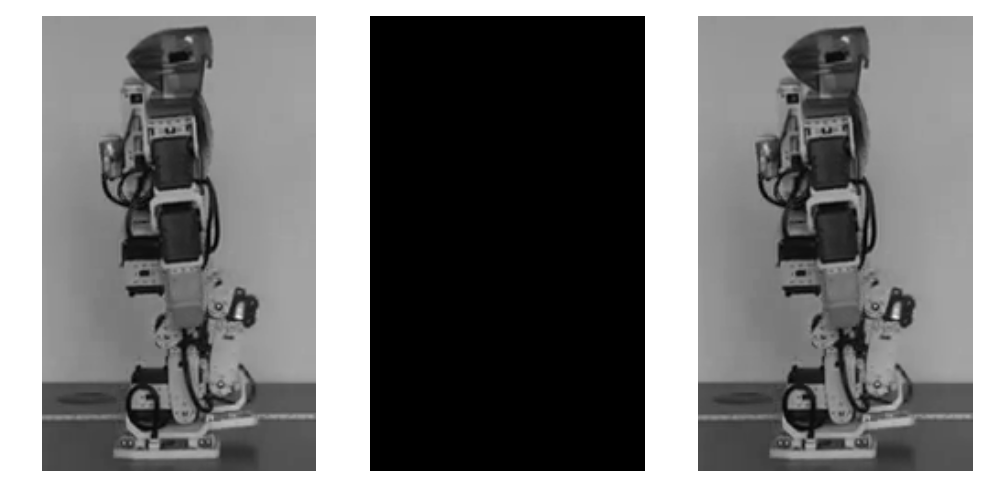

In [3]:
img = cv2.imread('data/biowalk-0300.png',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,2]

scl = 1
img_orig = cv2.resize(img[85:335, 150:300],None,fx=scl, fy=scl, interpolation = cv2.INTER_CUBIC)

dim_g = 5
sig_x,sig_y = 5, 5
img_blur = cv2.GaussianBlur(img_orig,(dim_g,dim_g),sig_x,sig_y)

D0 = 50
rows,cols = img_orig.shape
H_GHP = 1-pu.get_filter_for_image(rows,cols,D0,pu.filter_gaussian_fcn,params=2)

img_hp = np.abs(pu.apply_frecuency_filter_to_image(np.float64(img_blur),H_GHP))

dim_d = 5
img_laplace = np.abs(cv2.Laplacian(img_orig,cv2.CV_64F,ksize=dim_d))
img_sobel_x = np.abs(cv2.Sobel(img_orig,cv2.CV_64F,1,0,ksize=dim_d))
img_sobel_y = np.abs(cv2.Sobel(img_orig,cv2.CV_64F,0,1,ksize=dim_d))

w = [0.0,0.0,4.15,0.0]
#w = [1.2,1.2,1.0,0.75]
img_bordes = w[0]*img_sobel_x+w[1]*img_sobel_y+w[2]*img_hp+w[3]*img_laplace

img_bordes = pu.to_uint8(img_bordes)

thr = 24
border_thre = np.zeros_like(img_bordes); 
border_thre[img_bordes>=thr] = 1 #255

dim_m = 5
kernel_r = cv2.getStructuringElement(cv2.MORPH_RECT,(dim_m,dim_m))
border_thre = cv2.erode(border_thre,kernel_r,iterations = 1)

plt.figure(figsize=(12,28))
plt.subplot(1,3,1),plt.imshow(img[85:335, 150:300], 'gray'), plt.axis('off')
plt.subplot(1,3,2),plt.imshow(border_thre, 'gray'), plt.axis('off')
plt.subplot(1,3,3),plt.imshow(1.2*img_orig-1.2*border_thre*img_blur, 'gray'), plt.axis('off')
